**store the installed modules and versions**

In [1]:
# store the module versions
#!pip freeze > ../requirements.txt

## import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import eli5
from eli5.sklearn import PermutationImportance
import scikitplot as skplt
from sklearn.decomposition import PCA

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) # display all columns

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset  
read dataset, define delimiter, dtypes and encoding  

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009#winequality-red.csv  
This datasets is related to red variants of the Portuguese "Vinho Verde" wine.  
**Determine which physiochemical properties make a wine 'good'!**  

the dependent variable is wine **quality**

In [3]:
# view top 5 lines from raw file
!head -n 5 ../data/dataset/winequality-red.csv

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6


In [4]:
df = pd.read_csv("../data/dataset/winequality-red.csv", sep=",")

**rename columns**

In [5]:
df.columns = ['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar',
       'chlorideSalt', 'freeSulfurDioxide', 'totalSulfurDioxide', 'density',
       'pH', 'sulphatesAntiox', 'alcoholPct', 'qualityScore']

**Summarize data**  
+ make a report.html

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixedAcidity          1599 non-null float64
volatileAcidity       1599 non-null float64
citricAcid            1599 non-null float64
residualSugar         1599 non-null float64
chlorideSalt          1599 non-null float64
freeSulfurDioxide     1599 non-null float64
totalSulfurDioxide    1599 non-null float64
density               1599 non-null float64
pH                    1599 non-null float64
sulphatesAntiox       1599 non-null float64
alcoholPct            1599 non-null float64
qualityScore          1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.ftypes

fixedAcidity          float64:dense
volatileAcidity       float64:dense
citricAcid            float64:dense
residualSugar         float64:dense
chlorideSalt          float64:dense
freeSulfurDioxide     float64:dense
totalSulfurDioxide    float64:dense
density               float64:dense
pH                    float64:dense
sulphatesAntiox       float64:dense
alcoholPct            float64:dense
qualityScore            int64:dense
dtype: object

In [8]:
df.describe()

fixedAcidity  volatileAcidity   citricAcid  residualSugar  \
count   1599.000000      1599.000000  1599.000000    1599.000000   
mean       8.319637         0.527821     0.270976       2.538806   
std        1.741096         0.179060     0.194801       1.409928   
min        4.600000         0.120000     0.000000       0.900000   
25%        7.100000         0.390000     0.090000       1.900000   
50%        7.900000         0.520000     0.260000       2.200000   
75%        9.200000         0.640000     0.420000       2.600000   
max       15.900000         1.580000     1.000000      15.500000   

       chlorideSalt  freeSulfurDioxide  totalSulfurDioxide      density  \
count   1599.000000        1599.000000         1599.000000  1599.000000   
mean       0.087467          15.874922           46.467792     0.996747   
std        0.047065          10.460157           32.895324     0.001887   
min        0.012000           1.000000            6.000000     0.990070   
25%        0.070000           7.000000           22.000000     0.995600   
50%        0.079000          14.000000           38.000000     0.996750   
75%        0.090000          21.000000           62.000000     0.997835   
max        0.611000          72.000000          289.000000     1.003690   

                pH  sulphatesAntiox   alcoholPct  qualityScore  
count  1599.000000      1599.000000  1599.000000   1599.000000  
mean      3.311113         0.658149    10.422983      5.636023  
std       0.154386         0.169507     1.065668      0.807569  
min       2.740000         0.330000     8.400000      3.000000  
25%       3.210000         0.550000     9.500000      5.000000  
50%       3.310000         0.620000    10.200000      6.000000  
75%       3.400000         0.730000    11.100000      6.000000  
max       4.010000         2.000000    14.900000      8.000000

In [9]:
df.sample(5)

fixedAcidity  volatileAcidity  citricAcid  residualSugar  chlorideSalt  \
1270           5.0             0.38        0.01            1.6         0.048   
514           10.5             0.51        0.64            2.4         0.107   
453           10.4             0.33        0.63            2.8         0.084   
242            7.7             0.58        0.10            1.8         0.102   
1413           9.9             0.57        0.25            2.0         0.104   

      freeSulfurDioxide  totalSulfurDioxide  density    pH  sulphatesAntiox  \
1270               26.0                60.0  0.99084  3.70             0.75   
514                 6.0                15.0  0.99730  3.09             0.66   
453                 5.0                22.0  0.99980  3.26             0.74   
242                28.0               109.0  0.99565  3.08             0.49   
1413               12.0                89.0  0.99630  3.04             0.90   

      alcoholPct  qualityScore  
1270        14.0             6  
514         11.8             7  
453         11.2             7  
242          9.8             6  
1413        10.1             5

In [10]:
pp.ProfileReport(df).to_file("../data/report/index.html")

In [11]:
#There are 2 warnings
# citricAcid has 132 / 8.3% zeros
# Dataset has 240 duplicate rows

## Target incidence

In [12]:
# the target variable "quality" is continuous.
# aside from using regression modelling,
# is to set an arbitrary cutoff for the dependent variable at 7 or higher getting classified as 'good/1'
# and the remainder as 'not good/0'.

In [13]:
df["qualityDiscrete"] = pd.Series(df.apply(lambda x: 1 if x["qualityScore"] >= 7 else 0, axis=1))

In [14]:
df[["qualityScore","qualityDiscrete"]].sample(5)

qualityScore  qualityDiscrete
27               5                0
1299             3                0
295              5                0
793              5                0
76               5                0

In [15]:
# calculate the target incidence (preferred > 5%)
np.sum(df["qualityDiscrete"])/len(df)

0.1357098186366479

## create a PIG table

In [16]:
# Function that creates predictor insight graph table
def create_pig_table(df, variable, target):
  
    # Create groups for each variable
    groups = df[[target,variable]].groupby(variable)
    
    # Calculate size and target incidence for each group
    pig_table = groups[target].agg({'Size':np.size, 'Incidence':np.mean}).reset_index()
    
    # Return the predictor insight graph table
    return pig_table

In [17]:
# example for one random variable:
pig_table = create_pig_table(df, "volatileAcidity", "qualityDiscrete").sort_values(["Incidence"]).reset_index(drop=True)
pig_table

volatileAcidity  Size  Incidence
0              0.675     3   0.000000
1              0.830     4   0.000000
2              0.825     1   0.000000
3              0.820     5   0.000000
4              0.810     2   0.000000
5              0.805     1   0.000000
6              0.800     3   0.000000
7              0.795     2   0.000000
8              0.790     2   0.000000
9              0.785     8   0.000000
10             0.780    10   0.000000
11             0.775     4   0.000000
12             0.770     6   0.000000
13             0.765     5   0.000000
14             0.760     5   0.000000
15             0.755     3   0.000000
16             0.750     6   0.000000
17             0.745     5   0.000000
18             0.740    11   0.000000
19             0.730     6   0.000000
20             0.725     9   0.000000
21             0.720     5   0.000000
22             0.715    12   0.000000
23             0.710     3   0.000000
24             0.705     6   0.000000
25             0.700    10   0.000000
26             0.690    23   0.000000
27             0.680    12   0.000000
28             1.330     2   0.000000
29             0.670    23   0.000000
..               ...   ...        ...
113            0.660    26   0.192308
114            0.440    23   0.217391
115            0.635     9   0.222222
116            0.420    31   0.225806
117            0.380    35   0.228571
118            0.260    16   0.250000
119            0.840     8   0.250000
120            0.915     4   0.250000
121            0.370    24   0.250000
122            0.835     4   0.250000
123            0.320    23   0.260870
124            0.360    38   0.263158
125            0.350    22   0.272727
126            0.480    24   0.291667
127            0.290    16   0.312500
128            0.615     6   0.333333
129            0.585     3   0.333333
130            0.200     3   0.333333
131            0.815     3   0.333333
132            0.270    14   0.357143
133            0.240    13   0.384615
134            0.310    30   0.466667
135            0.210     6   0.500000
136            0.850     2   0.500000
137            0.395     2   0.500000
138            0.330    20   0.550000
139            0.280    23   0.565217
140            0.250     7   0.571429
141            0.300    16   0.625000
142            0.120     3   1.000000

[143 rows x 3 columns]

## create a PIG plot

In [18]:
def plot_pig(pig_table, variable):
    
    # Plot formatting
    plt.ylabel("Size", rotation=0, rotation_mode="anchor", ha="right" )
    
    # Plot the bars with sizes 
    pig_table["Size"].plot(kind="bar", width=0.5, color="lightgray", edgecolor="none") 
    
    # Plot the incidence line on secondary axis
    pig_table["Incidence"].plot(secondary_y=True)
    plt.ylim([0, 1])
    
    # Plot formatting
    plt.xticks(np.arange(len(pig_table)), pig_table[variable])
    plt.xlim([-0.5, len(pig_table) - 0.5])
    plt.ylabel("Incidence", rotation=0, rotation_mode="anchor", ha="left")
    plt.title(variable)
    
    plt.show()

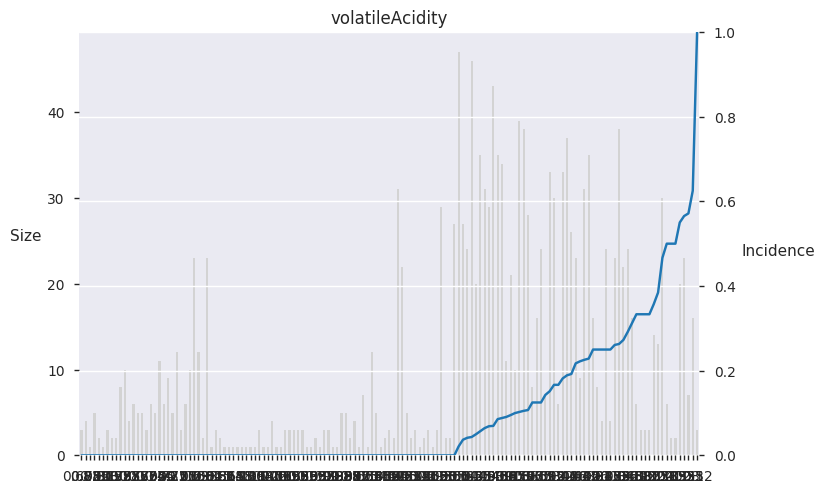

In [22]:
pig_table = create_pig_table(df, "volatileAcidity", "qualityDiscrete").sort_values(["Incidence"]).reset_index(drop=True)
plot_pig(pig_table, "volatileAcidity")

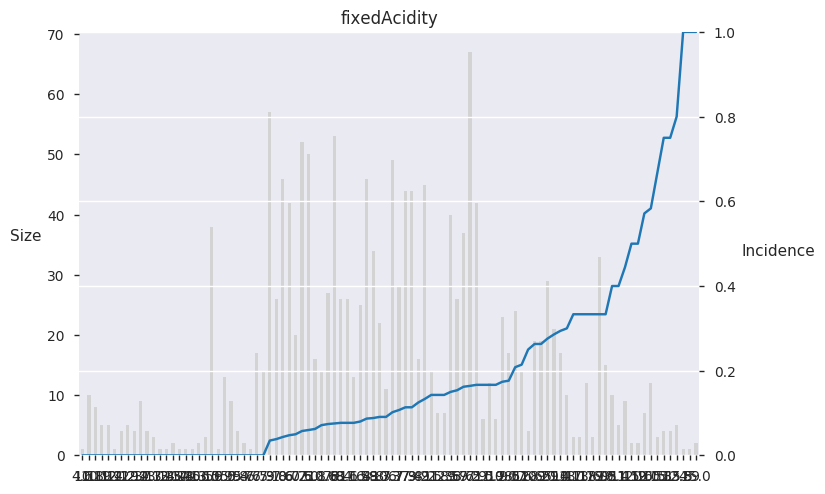

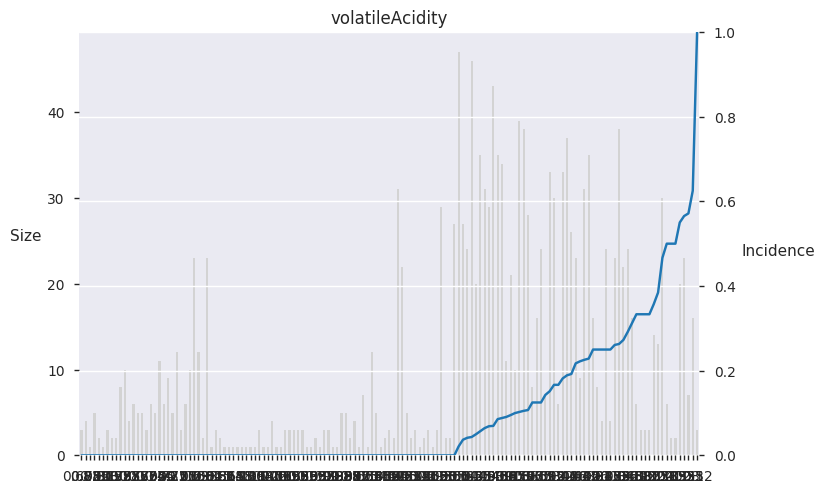

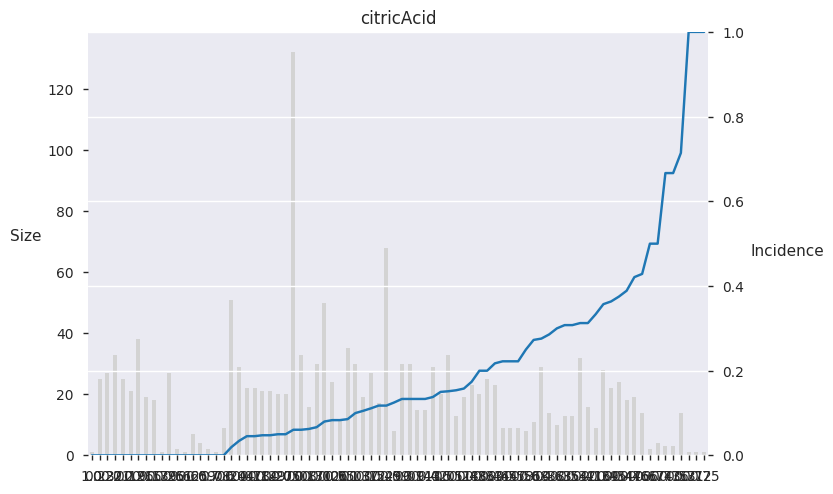

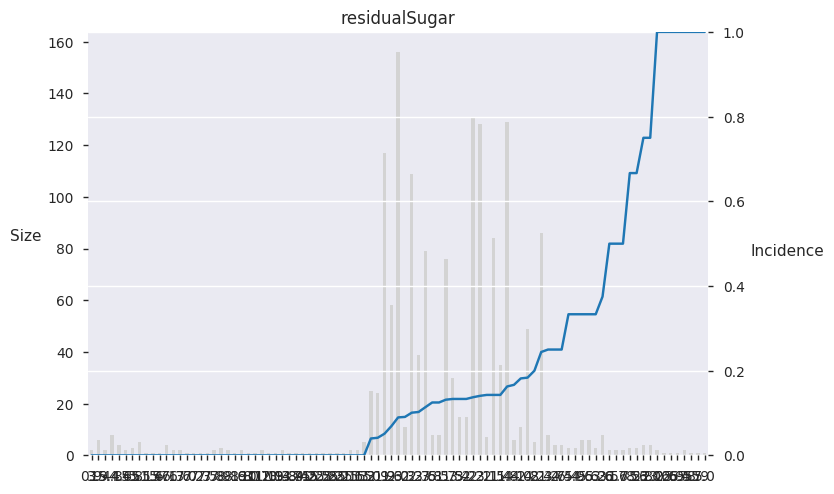

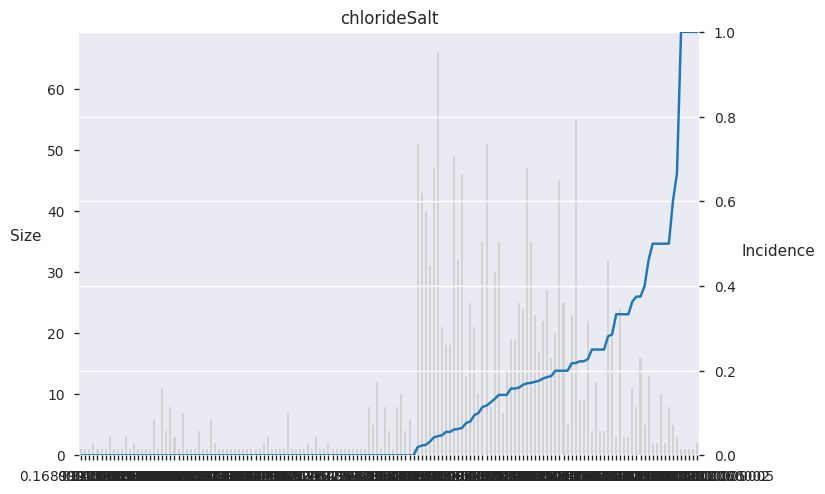

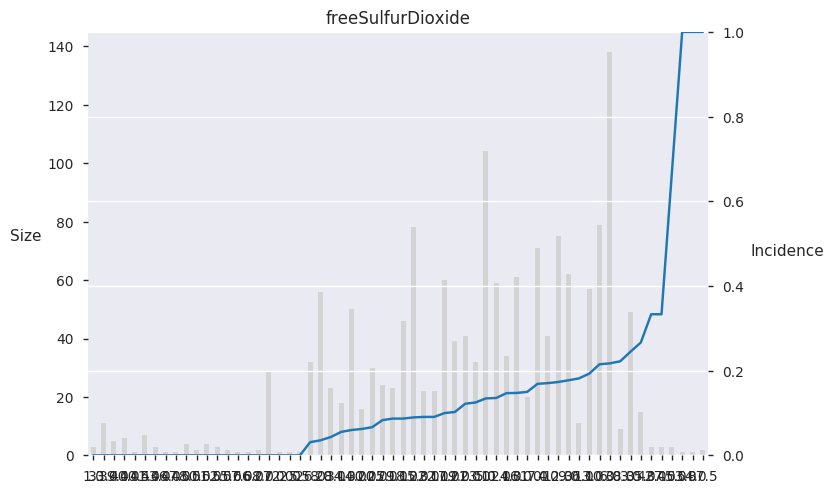

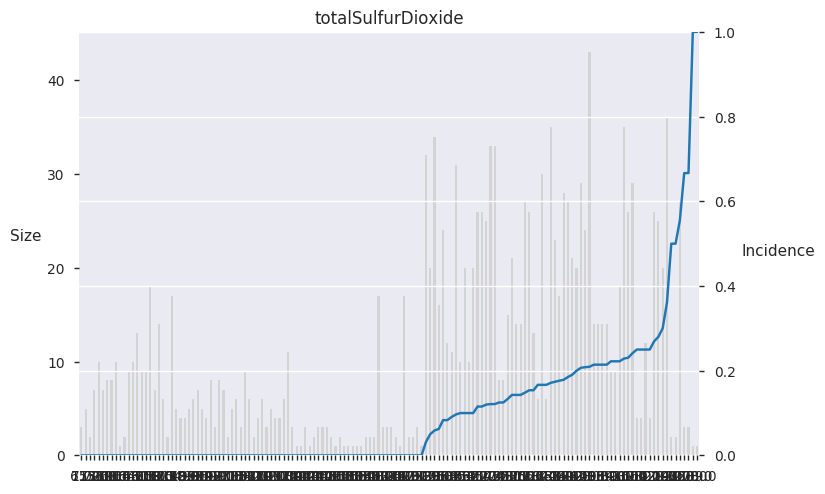

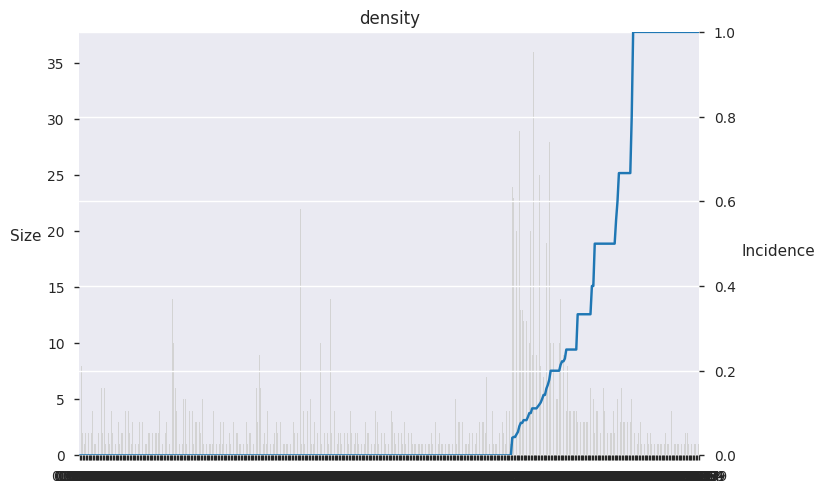

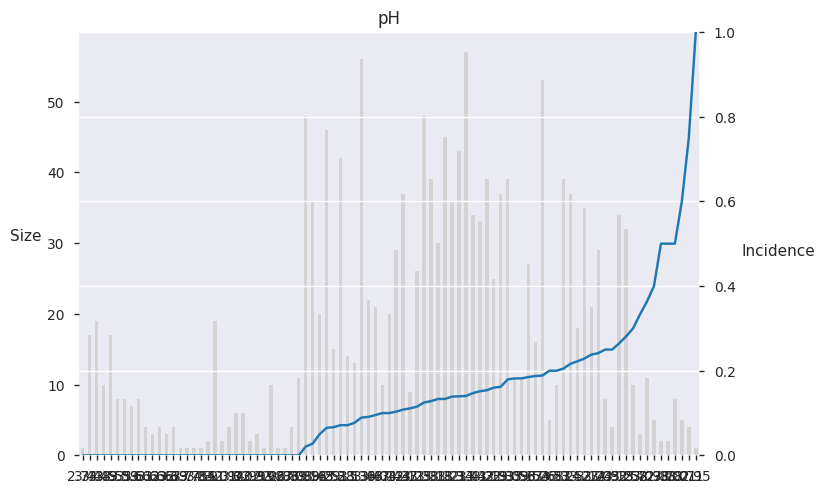

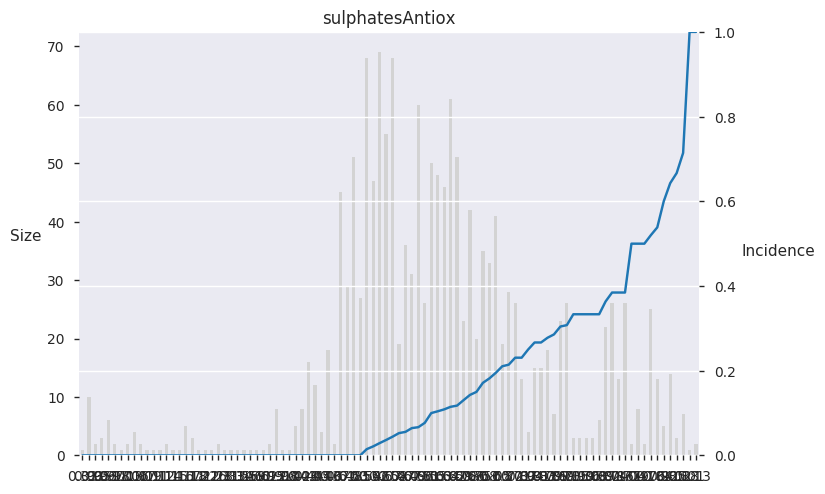

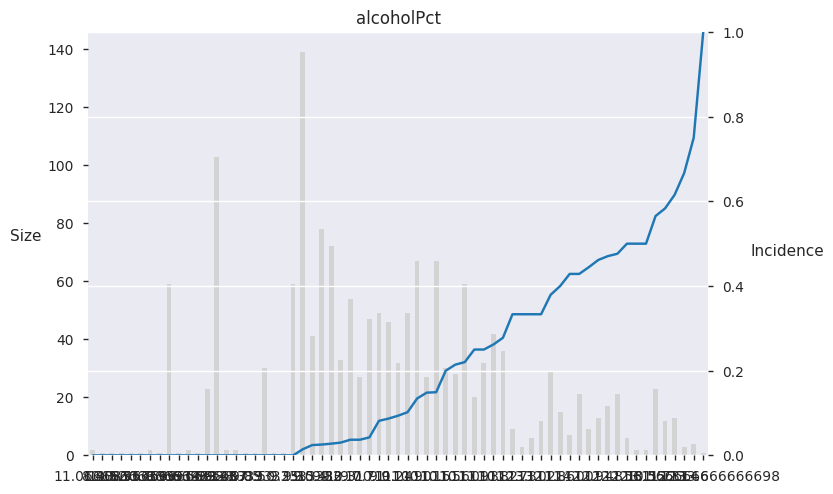

In [20]:
for col in ['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar',
       'chlorideSalt', 'freeSulfurDioxide', 'totalSulfurDioxide', 'density',
       'pH', 'sulphatesAntiox', 'alcoholPct']:
    pig_table = create_pig_table(df, col, "qualityDiscrete").sort_values(["Incidence"]).reset_index(drop=True)
    plot_pig(pig_table, col)

## data cleaning

In [23]:
# count duplicate rows
np.sum(df.duplicated())

240

In [24]:
# remove the 240 duplicate rows
df = df.drop_duplicates()

## Visualise features vs target

* X-axis = any feature category
* y-axis = target

In [26]:
targetContinuous = ["qualityScore"]
targetDiscrete = ["qualityDiscrete"]
features = ['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar',
       'chlorideSalt', 'freeSulfurDioxide', 'totalSulfurDioxide', 'density',
       'pH', 'sulphatesAntiox', 'alcoholPct']

<Figure size 2000x1800 with 0 Axes>

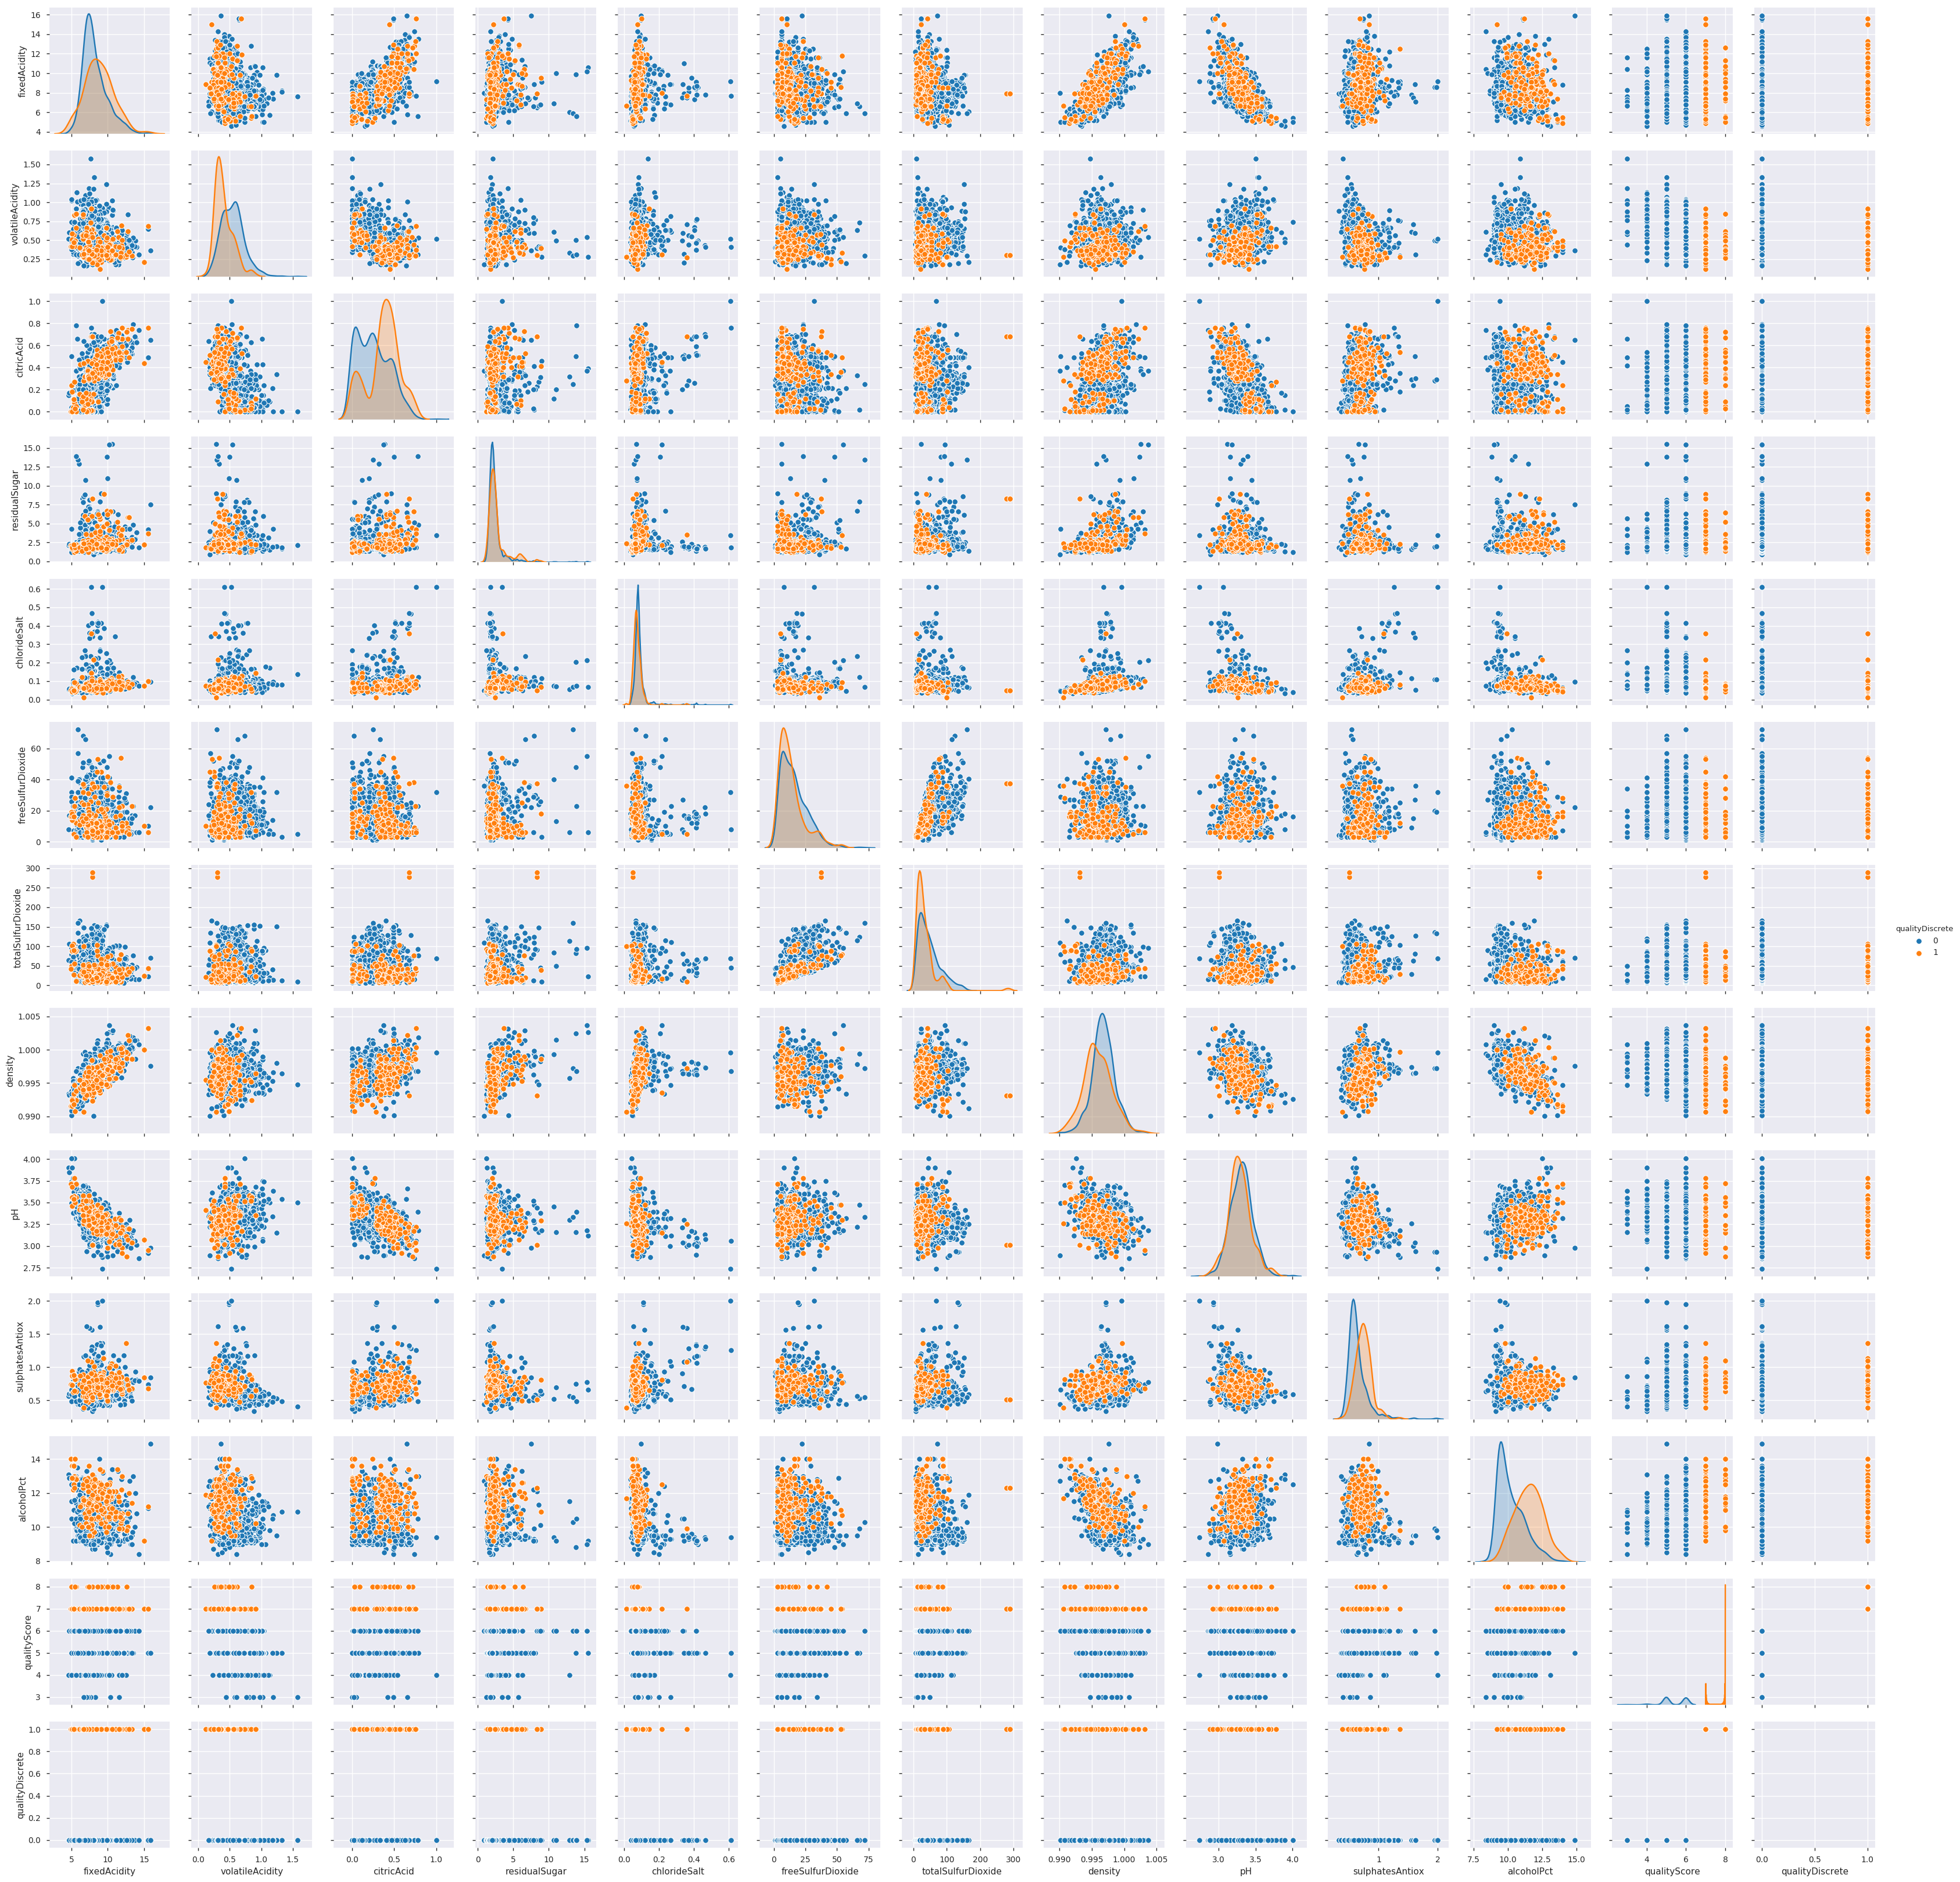

In [27]:
plt.figure(figsize=(20,18))
sns.pairplot(data=df, hue="qualityDiscrete")
plt.savefig("../data/plot/pairplot_binary_hue.png")

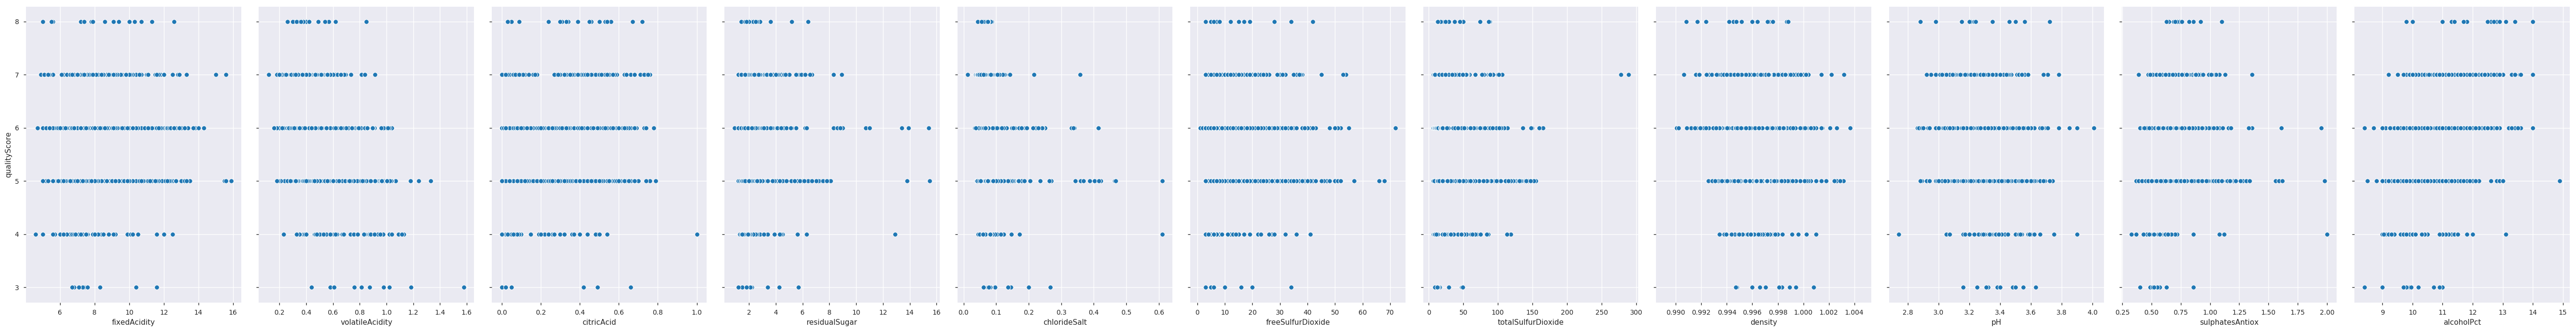

In [29]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df,
             x_vars=['fixedAcidity', 'volatileAcidity', 'citricAcid',
                     'residualSugar', 'chlorideSalt', 'freeSulfurDioxide',
                     'totalSulfurDioxide', 'density', 'pH', 'sulphatesAntiox', 'alcoholPct'],
             y_vars="qualityScore",
             size=7,
             aspect=0.7)

**here you see the trends for each feature, if we go higher in the quality**
* density
* cloride

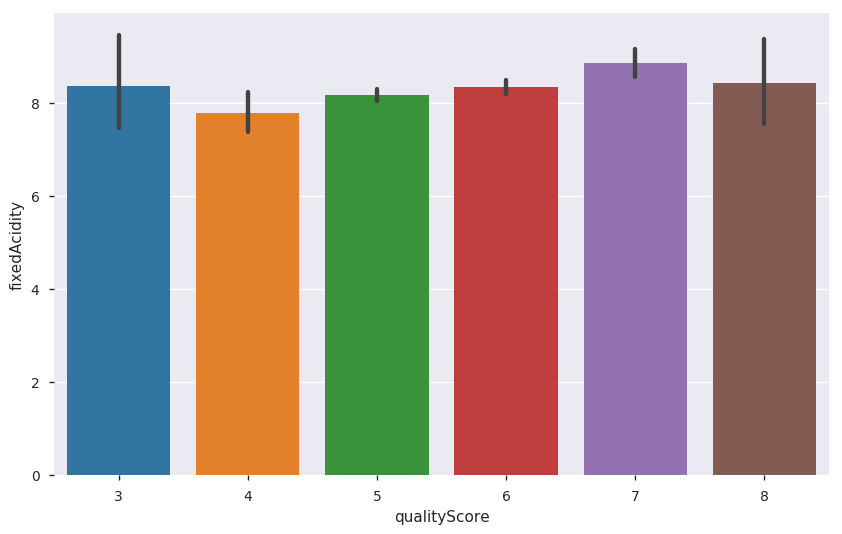

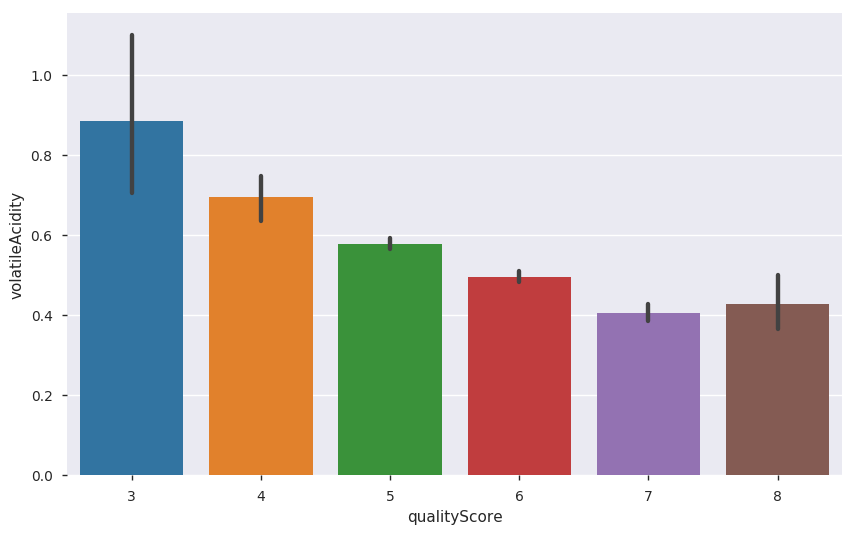

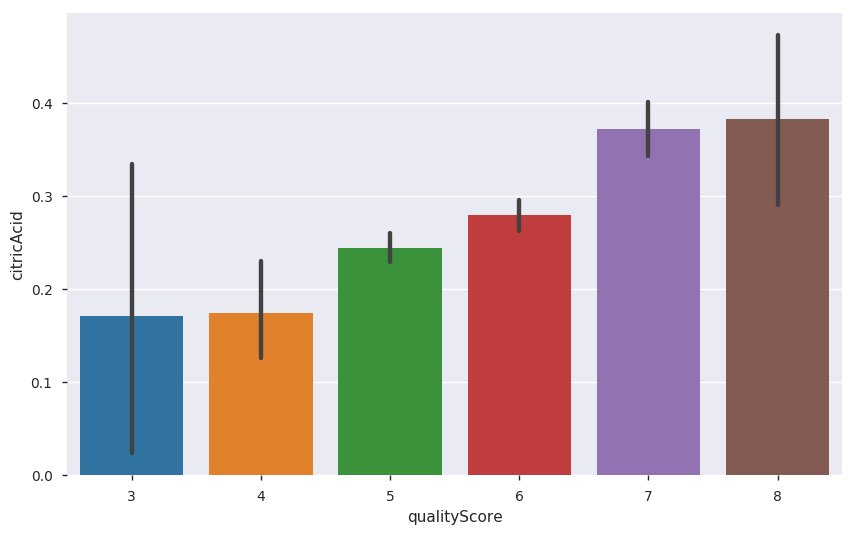

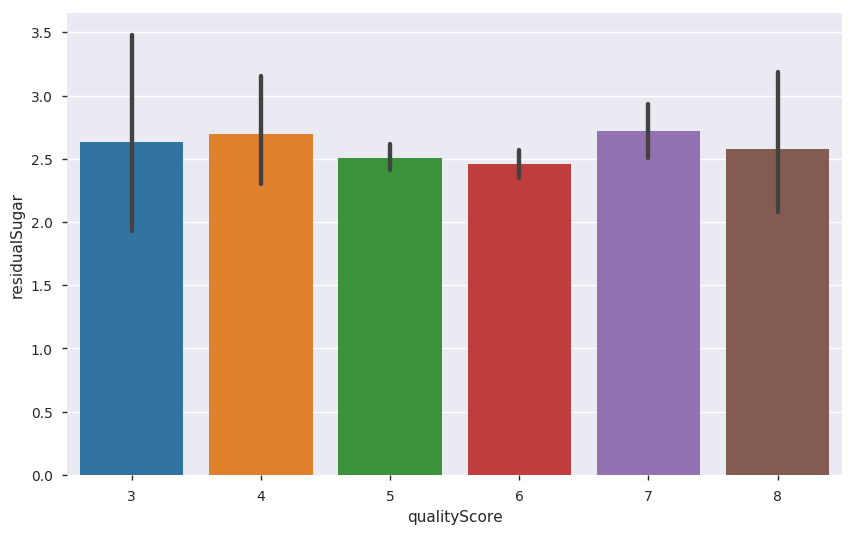

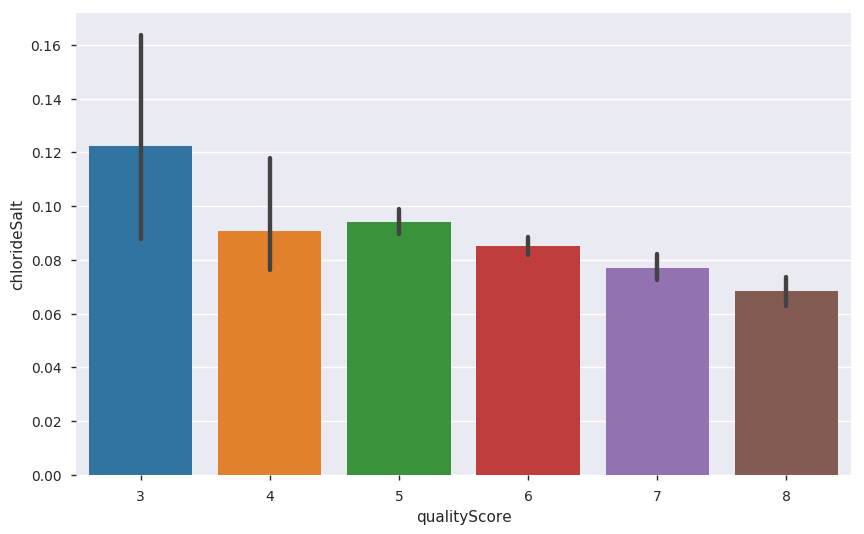

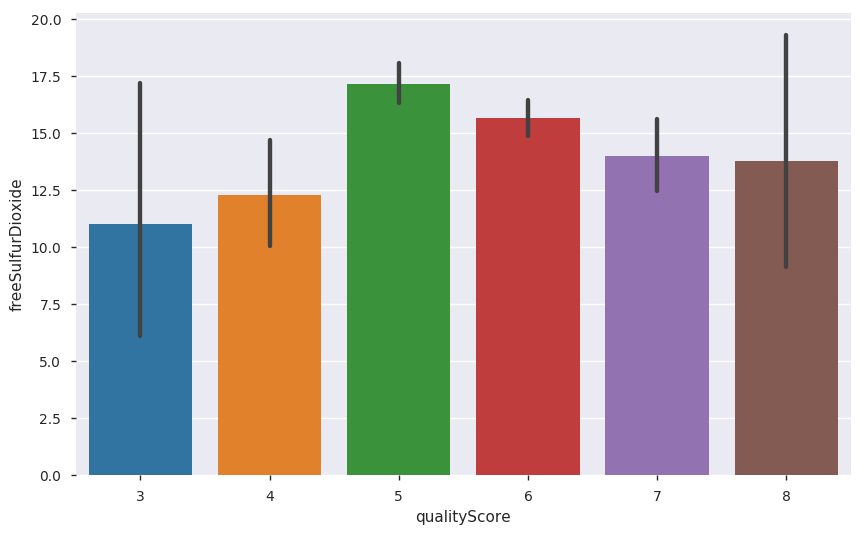

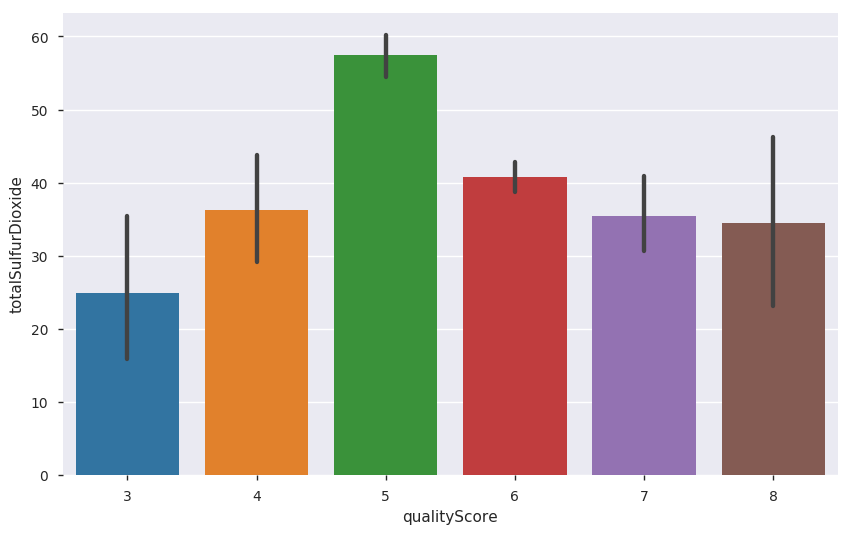

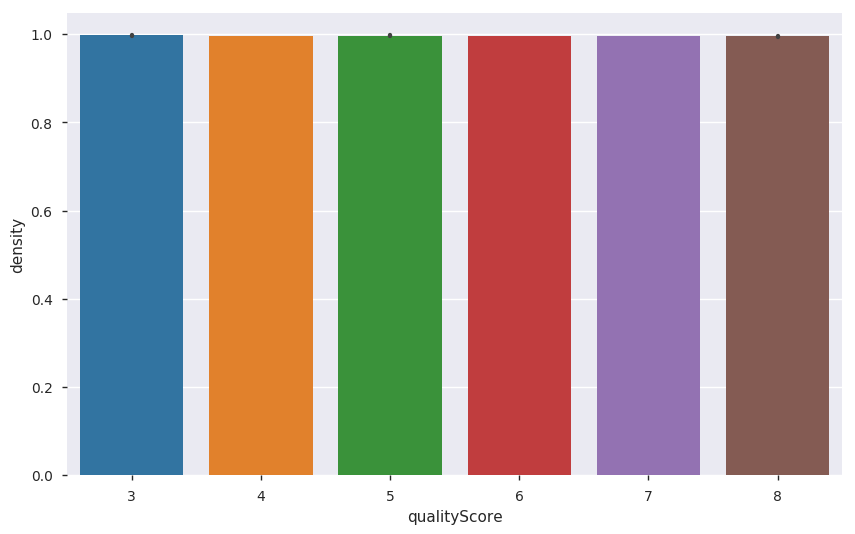

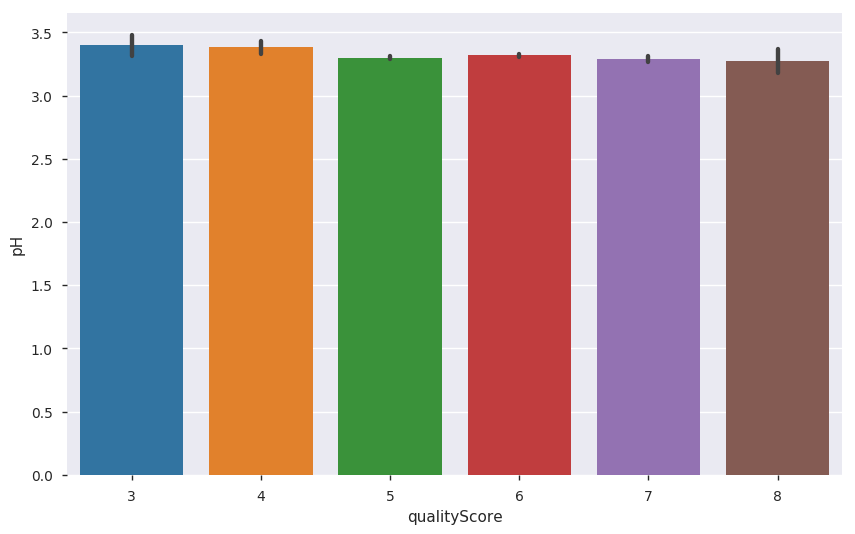

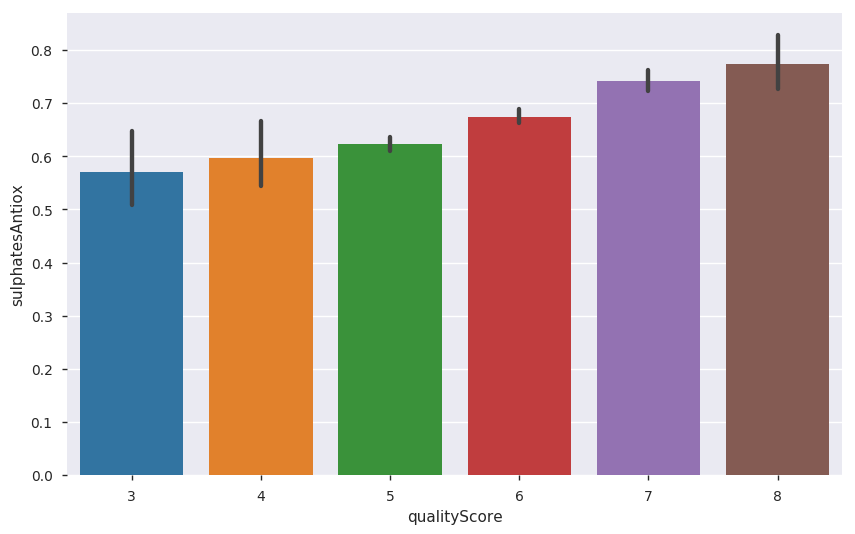

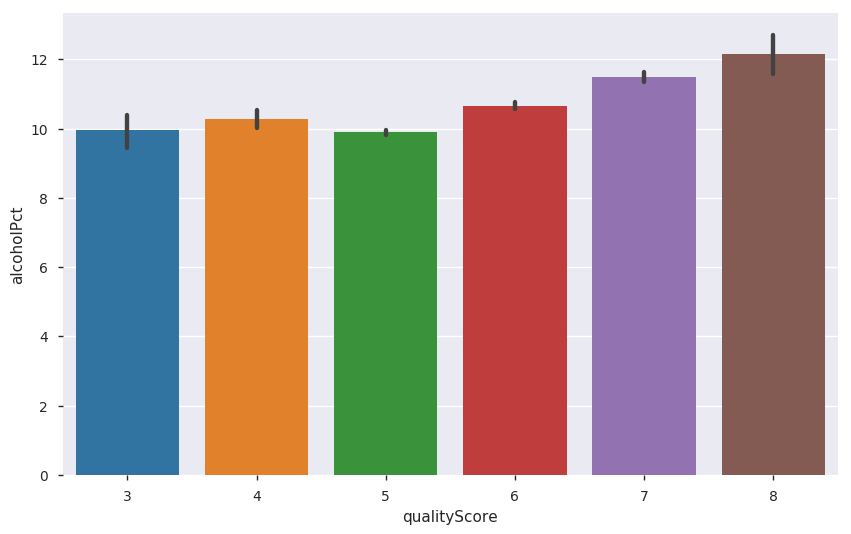

In [28]:
#Here we see that fixed acidity does not give any specification to classify the quality.
def check_quality(df, col):
    fig = plt.figure(figsize = (10,6))
    sns.barplot(x='qualityScore', y=col, data=df)

for col in ['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar',
       'chlorideSalt', 'freeSulfurDioxide', 'totalSulfurDioxide', 'density',
       'pH', 'sulphatesAntiox', 'alcoholPct']:
    check_quality(df, col)

## Transform Categorical data

In [30]:
# not needed, all features are continuous (pd.get_dummies...)
# binning could be usefull for feature engineering

## define the target and features

In [33]:
X = df.select_dtypes(include='float64')#.drop(['...'], axis=1)

In [34]:
# only target 'qualityScore'
y = df['qualityScore']

## check the feature correlations  
check if we the independent features are "independent"(good) or "correlated"(bad)

In [35]:
np.abs(X.corr()).style.background_gradient()

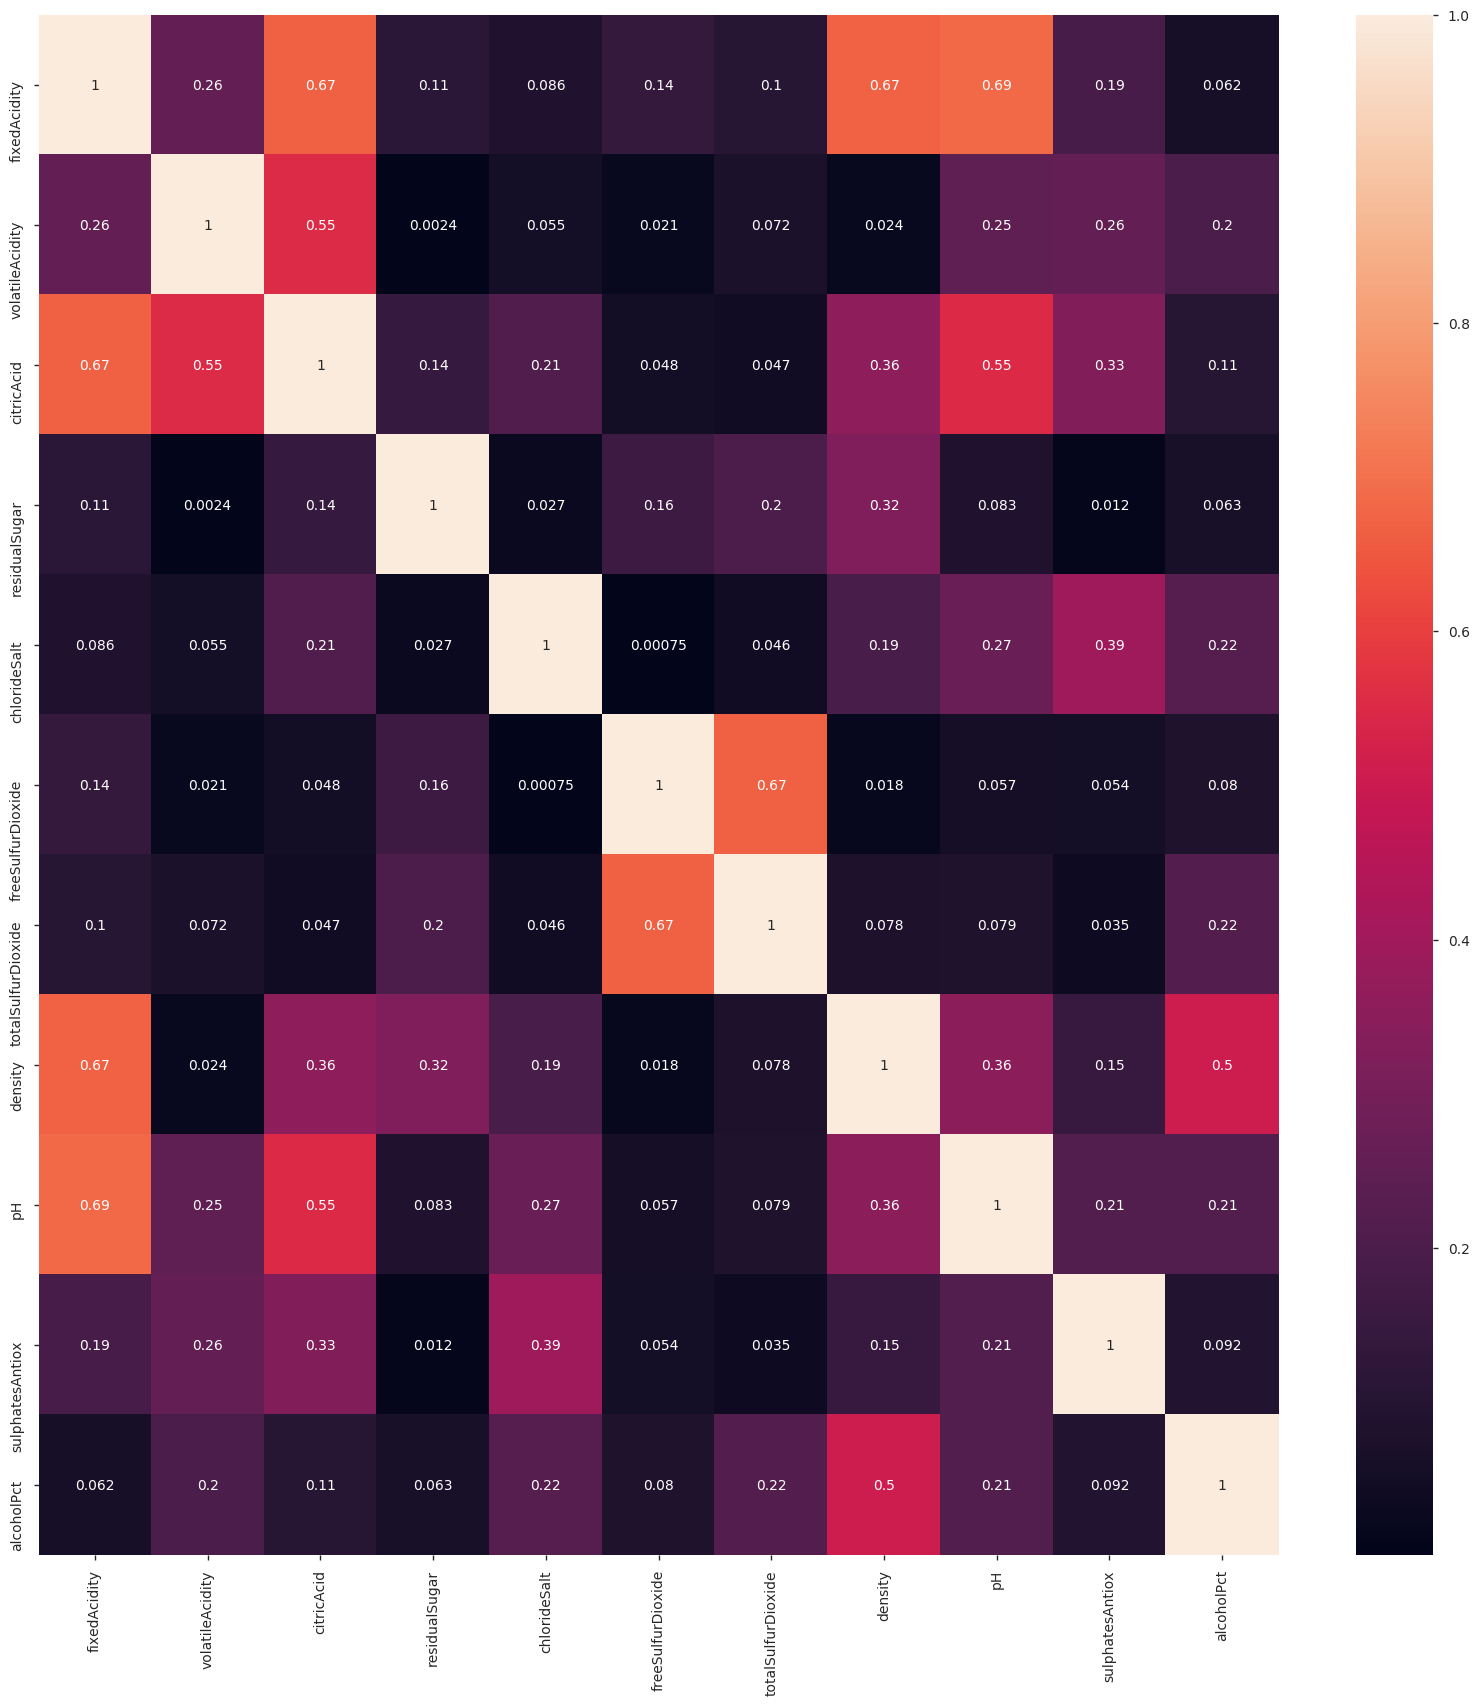

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(X.corr()), annot=True)
plt.savefig("../data/plot/feature_correlations.png")

## check the feature correlations with the target  
Be careful this is not a safe method for feature selection, permutation strategies are more robust

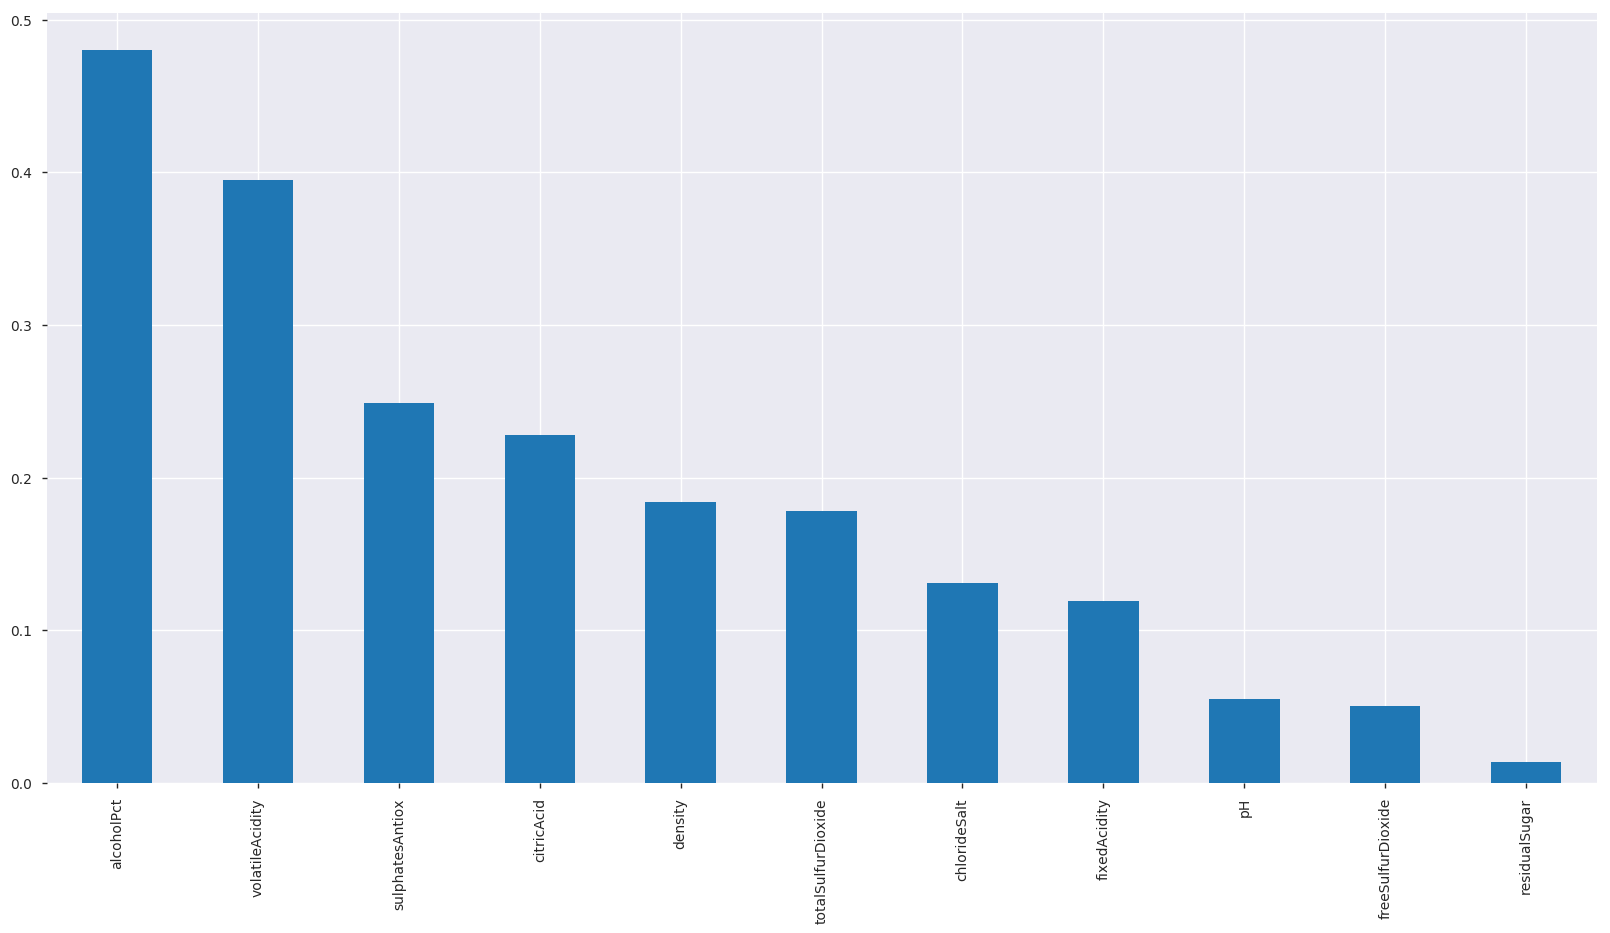

In [39]:
plt.figure(figsize=(20,10))
np.abs(X.corrwith(y)).sort_values(ascending=False).plot(kind='bar')
plt.savefig("../data/plot/correlations_against_target.png")

**not conclusive, feature importance is better**

## checking variance (width) of each feature  
this can help check in some way for skewness as well because models expect normal distribution  
if np.var() > 1, then we can choose to flatten:
* np.log()
* np.sqrt()

In [41]:
np.var(X).sort_values(ascending=False)

totalSulfurDioxide    1115.336345
freeSulfurDioxide      109.065143
fixedAcidity             3.014913
residualSugar            1.827407
alcoholPct               1.170004
citricAcid               0.038206
volatileAcidity          0.033476
sulphatesAntiox          0.029106
pH                       0.024019
chlorideSalt             0.002436
density                  0.000003
dtype: float64

## Feature engineering

In [42]:
# investigate zeros
# investigate binning based on the pig plot values
# return later and change later...

## Normalization of features  
**scale the features**

In [43]:
# Scaling features (only feature NOT observation)
scaler = StandardScaler()

In [44]:
X_scaled = scaler.fit_transform(X)

In [45]:
# make it back to a DataFrame to preserve column names for insight
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [46]:
# we do not scale the target variable

## Split SCALED data so we can validate the model later

In [47]:
# make sure we stratify our sample based on the target
# set a fixed sample state
# split between 80/20 (train/test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=0)

## choose a model

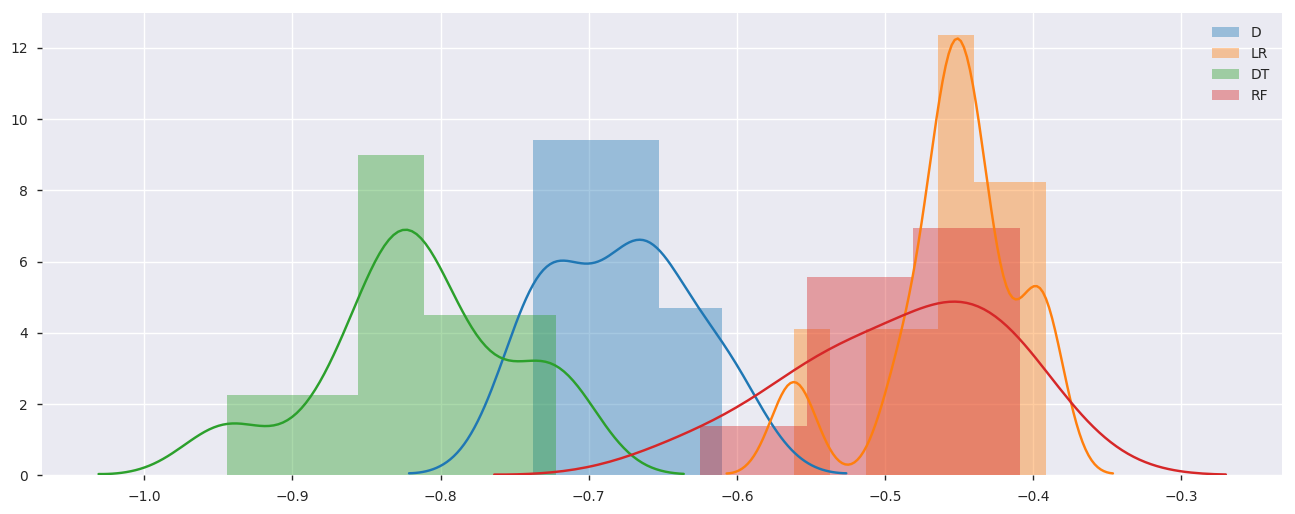

In [48]:
# compare these models:
models = []
models.append(('D', DummyRegressor()))
models.append(('LR', LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))

results = []

# choose the number of CV splits: (recommended: K=10)
n_splits = 10

#cv = KFold(n_splits=n_splits, shuffle=False)          #<== (Regression or ...)
#cv = ShuffleSplit(n_splits=n_splits, shuffle=False)   #<== (Classification only)
cv = StratifiedKFold(n_splits=n_splits, shuffle=False) #<== (Classification or Regression) +Stratify better !

# choose your scoring metric based on Regression group: ...
# https://scikit-learn.org/stable/modules/model_evaluation.html
plt.figure(figsize=(16,6))
for name, model in models:
    score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    results.append((name, score))
    sns.distplot(score, label=name)
    plt.legend()
plt.savefig("../data/plot/choose_a_model.png")

results = pd.DataFrame(dict(results))

**we see Linear Regression has the upper hand.**  
**next we need the hyperparameters,  
but for performance reasons we train on the 90% most important features.**

## Hyperparameter tuning

### plot cumulative sum variance ratio to show how many variables explain 90% variance effect  
**we use PCA black box method**

In [49]:
pca = PCA()

In [50]:
pca_var_ratio = pca.fit(X_scaled).explained_variance_ratio_

In [51]:
pca_var_ratio

array([0.28293989, 0.17347505, 0.14066813, 0.11368012, 0.08735304,
       0.05796439, 0.05335491, 0.03746183, 0.03126706, 0.01647314,
       0.00536244])

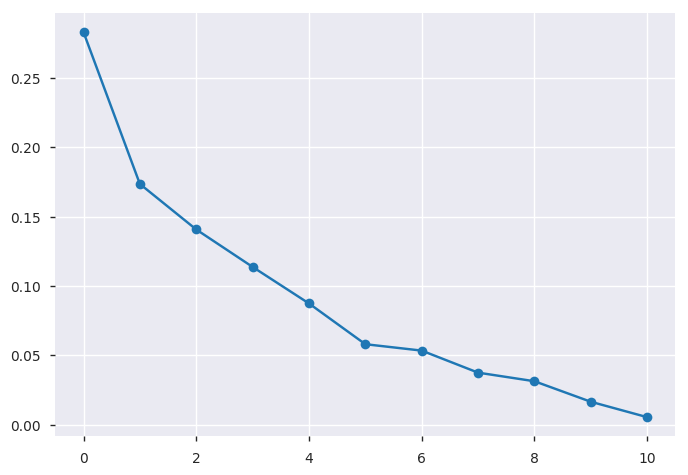

In [52]:
plt.plot(pca_var_ratio, marker='o')

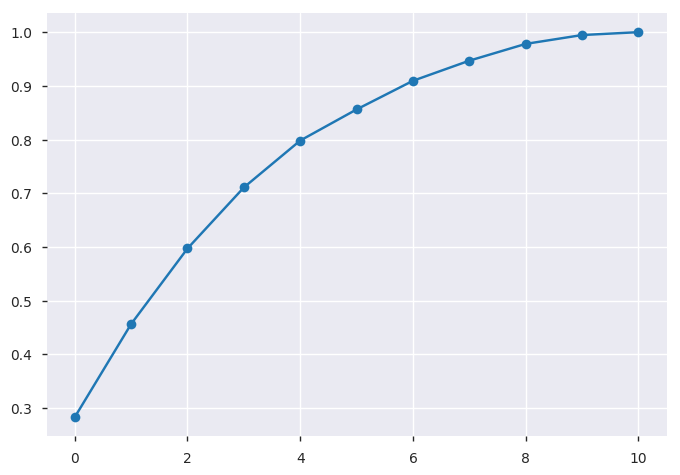

In [53]:
plt.plot(np.cumsum(pca_var_ratio), marker='o')

**7 principal components attribute for 90% of variation in the data.**  
**We shall pick the first 7 components for our prediction.**  
**cutoff at 90% means we may use 7/11 variables**

**you no longer know the variable labels, but that's ok just for parameter searching**

### automated feature selection using PCA up to 90%

In [69]:
pca = PCA(n_components=0.9, svd_solver='full')

In [70]:
# temporary use for the gridsearch using scaled and split feature data
X_pca = pca.fit_transform(X_train)

In [71]:
print("Keep {}/{} features".format(X_pca.shape[1], X_scaled.shape[1]))

Keep 7/11 features


### Hyperparameter tuning LinearRegression

In [72]:
estimator = LinearRegression()

In [73]:
# this is a bit silly, but you get the idea...
params={'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [74]:
# choose number of splits: (recommended: 10)
# it was chosen before : n_splits=10 folds
cv = StratifiedKFold(n_splits=n_splits, shuffle=True)

In [75]:
grid = GridSearchCV(estimator, param_grid=params, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, verbose=3)

In [76]:
%%time
# calculate the best parameters
grid.fit(X_pca, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] fit_intercept=True, normalize=True, copy_X=True .................
[CV]  fit_intercept=True, normalize=True, copy_X=True, score=-0.5548155706621068, total=   0.0s
[CV] fit_intercept=True, normalize=True, copy_X=True .................
[CV]  fit_intercept=True, normalize=True, copy_X=True, score=-0.45272379930301737, total=   0.0s
[CV] fit_intercept=True, normalize=True, copy_X=True .................
[CV]  fit_intercept=True, normalize=True, copy_X=True, score=-0.5358218631158269, total=   0.0s
[CV] fit_intercept=True, normalize=True, copy_X=True .................
[CV]  fit_intercept=True, normalize=True, copy_X=True, score=-0.47066988688706285, total=   0.0s
[CV] fit_intercept=True, normalize=True, copy_X=True .................
[CV]  fit_intercept=True, normalize=True, copy_X=True, score=-0.43248670761747443, total=   0.0s
[CV] fit_intercept=True, normalize=True, copy_X=True .................
[CV]  fit_intercept=True, norm

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  fit_intercept=False, normalize=False, copy_X=False, score=-32.55112688821698, total=   0.0s
[CV] fit_intercept=False, normalize=False, copy_X=False ..............
[CV]  fit_intercept=False, normalize=False, copy_X=False, score=-33.026615395445056, total=   0.0s
[CV] fit_intercept=False, normalize=False, copy_X=False ..............
[CV]  fit_intercept=False, normalize=False, copy_X=False, score=-32.334575212203525, total=   0.0s
[CV] fit_intercept=False, normalize=False, copy_X=False ..............
[CV]  fit_intercept=False, normalize=False, copy_X=False, score=-32.32597372093203, total=   0.0s
[CV] fit_intercept=False, normalize=False, copy_X=False ..............
[CV]  fit_intercept=False, normalize=False, copy_X=False, score=-32.91953822634631, total=   0.0s
[CV] fit_intercept=False, normalize=False, copy_X=False ..............
[CV]  fit_intercept=False, normalize=False, copy_X=False, score=-32.89431998738927, total=   0.0s
[CV] fit_intercept=False, normalize=False, copy_X=Fals

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [79]:
print("here is the best hyperparameter:")
grid.best_estimator_
# it's a bit simple here...

here is the best hyperparameter:


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

## detect BIAS and Feature Importance (Permutation method)

**we need the estimator and the hyperparameters**  
**make sure you use all the scaled features that were not PCA black boxed**  
**this way we can understand and explain the model inference**

In [101]:
from eli5.sklearn import PermutationImportance

In [102]:
lm = grid.best_estimator_

In [103]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [104]:
perm = PermutationImportance(lm)

In [105]:
perm.fit(X_train, y_train)

PermutationImportance(cv='prefit',
           estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
           n_iter=5, random_state=None, refit=True, scoring=None)

In [106]:
perm.feature_importances_

array([ 1.08289872e-03,  1.07579314e-01,  6.88068481e-05,  7.65243878e-04,
        2.90668191e-02,  2.06444010e-03,  2.38314414e-02, -8.76874006e-05,
        2.10640053e-02,  7.37821456e-02,  2.48845682e-01])

In [107]:
# green/red : positive/negative importance
# zero's and negatives features can be removed
# BIAS : optional value to watch out for
# this is better than doing a correlation with target
eli5.show_weights(perm, feature_names=X_train.columns.values)

**try to compare this with Randomforest feature_importance_ method**

In [109]:
# to be checked later...

## Predict

In [125]:
X_test.shape
# this is also scaled data

(272, 11)

In [126]:
# create prediction values
# notice: the X_test has had the same feature cleaning, engineering, transformations !
y_predict = grid.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'y predict')

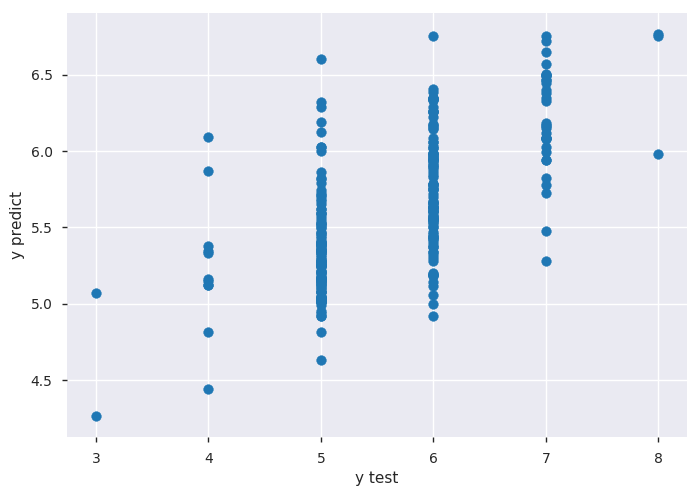

In [112]:
plt.scatter(y_test, y_predict)
plt.xlabel('y test')
plt.ylabel('y predict')

## Model Evaluation  
**evaluate our model performance by calculating the**  
* Mean Absolute Error
* Mean Squared Error
* Root Mean Squared Error
* R² Score

In [113]:
# calculate the Mean Squared Error,
# remember you need to use predict_proba
print('MAE:', mean_absolute_error(y_test, y_predict))
print('MSE:', mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predict)))
print('R²:', r2_score(y_test, y_predict))

MAE: 0.4786078447991875
MSE: 0.38902471914534725
RMSE: 0.6237184614434202
R²: 0.4200881541526591


### Residuals  
make sure everything was okay with our data.  
histogram of the residuals and make sure it looks normally distributed.

In [115]:
residuals = y_test - y_predict

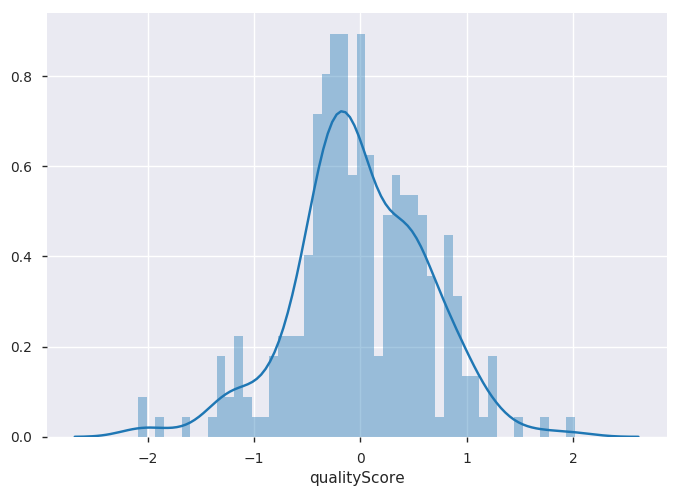

In [116]:
sns.distplot(residuals, bins=50)

**plot the error terms against the predicted values**

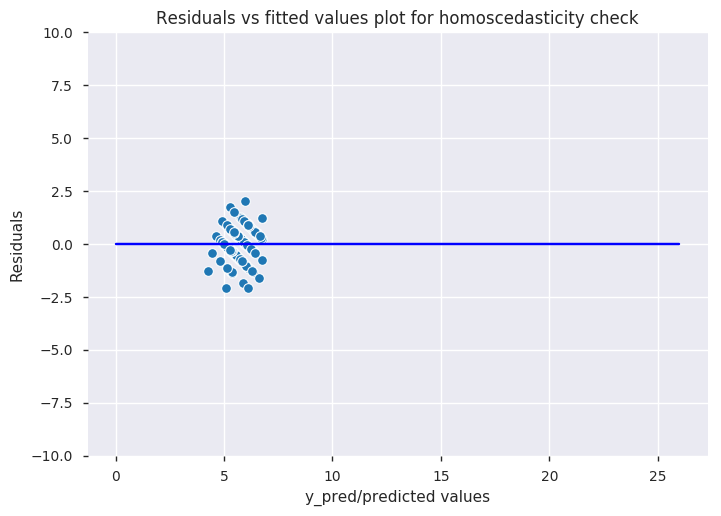

In [119]:
p = sns.scatterplot(y_predict, residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
#plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [120]:
# https://www.kaggle.com/shrutimechlearn/step-by-step-assumptions-linear-regression/data?utm_medium=email&utm_source=intercom&utm_campaign=datanotes-2019

## conclusion
**interpret these coefficients**

In [121]:
coeffecients = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coeffecient'])
coeffecients

Coeffecient
fixedAcidity          -0.018873
volatileAcidity       -0.198736
citricAcid            -0.003909
residualSugar          0.019672
chlorideSalt          -0.101073
freeSulfurDioxide      0.028819
totalSulfurDioxide    -0.089287
density               -0.008030
pH                    -0.077753
sulphatesAntiox        0.158101
alcoholPct             0.296882

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **alcoholPct** is associated with an **increase of 0.3 quality points**.
- Holding all other features fixed, a 1 unit increase in **volatileAcidity** is associated with a **decrease of 1.1 quality points**.
- Holding all other features fixed, a 1 unit increase in **sulphatesAntiox** is associated with an **increase of 0.9 quality points**.
- Holding all other features fixed, a 1 unit increase in **chlorideSalt** is associated with a **decrease of 2.1 quality points**.
- etc...

**Print out the intercept of the model**

In [122]:
# The coefficients
print('Intercept: \n', lm.intercept_)

Intercept: 
 5.623768117712682


In [123]:
lm.__dict__

{'_residues': 481.4420660829438,
 'coef_': array([-0.01887302, -0.19873597, -0.00390915,  0.01967223, -0.10107344,
         0.02881854, -0.08928736, -0.00803009, -0.07775341,  0.1581006 ,
         0.29688158]),
 'copy_X': True,
 'fit_intercept': True,
 'intercept_': 5.623768117712682,
 'n_jobs': None,
 'normalize': True,
 'rank_': 11,
 'singular_': array([1.76155882, 1.39282666, 1.25586174, 1.09175401, 0.98423376,
        0.80185105, 0.77343308, 0.63176445, 0.58768365, 0.41828589,
        0.24184185])}